In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os 
import csv
from math import log2


sys.path.insert(0, '..')
os.chdir('..')
print(os.getcwd())

%load_ext autoreload
%autoreload 2

/Users/pranayjain/Desktop/Security Research/constrained-padding-sequences


In [2]:
from precision_recall import precision_recall_autcomplete, precision_recall_wiki, precision_recall_linode_from_index, compute_precision_recall_ldiv_pad_scheme

from pwod import run_pwod
from pfs import run_pfs
from mvmd import run_mvmd
from bdk import run_bdk

### Plotting Code

#### Key for plots

In order to work with the LaTex macros used in our paper, we use certain macros as the titles in the plots below. To understand what they mean, please refer to the following key:

- `\noDistAlg`: PWOD algorithm
- `\ourAlg`: PFS algorithm
- `\bdkAlg`: BDK algorithm
- `\lDivAlg`: MVMD-3 algorithm

The `\padFactor` macro refers to the padding factor (c) argument for the algorithms. 

In [3]:
mp_keys = ['\\noDistAlg', '\\ourAlg', '\\lDivAlg{3}', '\\bdkAlg']
# mp_keys = ['\\noDistAlg (\\padFactor=1.25)', '\\ourAlg (\\padFactor=1.25)', '\\lDivAlg{3}', '\\bdkAlg']

In [4]:
style_dict = {}                # (style, color, marker)

style_dict['\\noDistAlg']          = ('dashed', 'darkgrey', 'o')
# style_dict['\\noDistAlg (\\padFactor=1.25)']          = ('dashed', 'darkgrey', 'o')
style_dict['\\ourAlg']             = ('solid', 'black', 'D')
# style_dict['\\ourAlg (\\padFactor=1.25)']             = ('solid', 'black', 'D')
style_dict['\\lDivAlg{3}']    = ('dashdot', '#047495', 'x')
style_dict['\\bdkAlg']                    = ('dotted', 'blue', 'o')

In [5]:
def plot_precision_recall(plot_mp):
    f, ax = plt.subplots()
    ax.set_xlim(left=0)
    ax.set_xlim(right=1)
    ax.set_ylim(bottom=0)
    ax.set_ylim(top=1)

    # plot_mp = { k:v for k, v in mp.items() if k in mp_keys }

    for method, precision_recall_map in plot_mp.items():
        ax.plot(
            list(precision_recall_map.keys()),
            list(precision_recall_map.values()),
            label=method,
            linestyle=style_dict[method][0],
            color=style_dict[method][1],
            marker=style_dict[method][2],
            linewidth=2)

    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    # plt.title(f'Target Set: Words of Length {seq_len}')
    # plt.legend()

    major_ticks = np.arange(0, 1.1, 0.2)
    minor_ticks = np.arange(0, 1.1, 0.1)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)

    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # And a corresponding grid
    plt.grid(which='both', alpha=1, linestyle='dotted')

    legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(ax.lines))

    plt.show()

### Autocomplete Dataset

In [6]:
dataset = 'autocomplete'
c = 1.25
l = 3

plot_mp = {}

pad_scheme_pwod, _ = run_pwod(dataset, c)
pad_scheme_pfs = run_pfs(dataset, c)['pad_scheme']

pad_scheme_bdk = run_bdk(dataset, num_trials=1000)['pad_scheme']

pad_scheme_mvmd = run_mvmd(dataset, l)['pad_scheme']

pad_scheme_bdk_flat = {k: v[0][0] for k,v in pad_scheme_bdk.items()}
pad_scheme_flat_pwod = {k: v[0][0] for k, v in pad_scheme_pwod.items() }

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-18
Gurobi's optimization method runtime (in seconds): 23.71373701095581
Completed BDK Run 0
Completed BDK Run 1
Completed BDK Run 2
Completed BDK Run 3
Completed BDK Run 4
Completed BDK Run 5
Completed BDK Run 6
Completed BDK Run 7
Completed BDK Run 8
Completed BDK Run 9
Completed BDK Run 10
Completed BDK Run 11
Completed BDK Run 12
Completed BDK Run 13
Completed BDK Run 14
Completed BDK Run 15
Completed BDK Run 16
Completed BDK Run 17
Completed BDK Run 18
Completed BDK Run 19
Completed BDK Run 20
Completed BDK Run 21
Completed BDK Run 22
Completed BDK Run 23
Completed BDK Run 24
Completed BDK Run 25
Completed BDK Run 26
Completed BDK Run 27
Completed BDK Run 28
Completed BDK Run 29
Completed BDK Run 30
Completed BDK Run 31
Completed BDK Run 32
Completed BDK Run 33
Completed BDK Run 34
Completed BDK Run 35
Completed BDK Run 36
Completed BDK Run 37
Completed BDK Run 38
Completed BDK Run 39
Completed 

311
Counter({7: 899})
Target set size: 44; test set size: 899
number of words: 899
Len test seqs: 818
Len observed: 164
Len adversary: 15 818
0.20048899755501245
('toucher', (306, 306, 306, 383, 383, 383, 383))
Tau: 0; precision=0.0402549501542984, recall=1.0
Tau: 0.1; precision=0.7177715278323988, recall=0.17718343630706015
Tau: 0.2; precision=0.7177715278323988, recall=0.17718343630706015
Tau: 0.3; precision=0.7177715278323988, recall=0.17718343630706015
Tau: 0.5; precision=0.7177715278323988, recall=0.17718343630706015
Tau: 0.75; precision=0.988183836009923, recall=0.05796843701515053
Tau: 0.8; precision=0.988183836009923, recall=0.05796843701515053
Tau: 0.9; precision=0.988183836009923, recall=0.05796843701515053
Tau: 1; precision=0.9999999999999958, recall=0.0009076117838799415
311
Counter({7: 899})
Target set size: 44; test set size: 899
number of words: 899
Len test seqs: 818
Len observed: 164
Len adversary: 11 818
0.20048899755501245
('toucher', (306, 306, 306, 383, 383, 383, 3

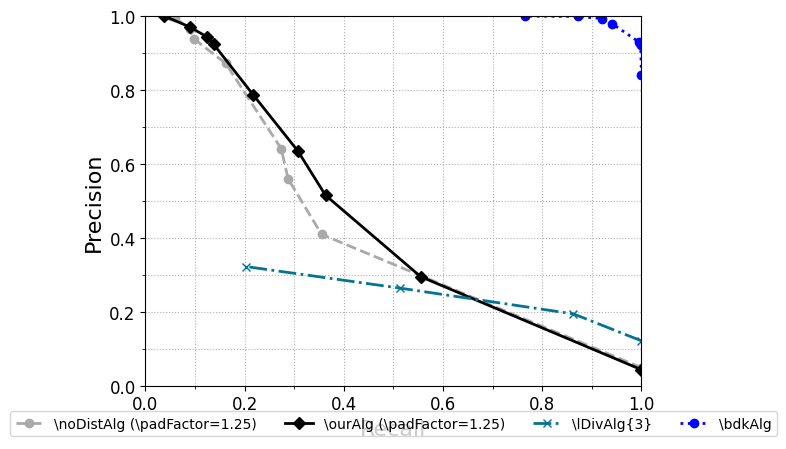

In [7]:
seq_len = 7
recall_precision_mp = precision_recall_autcomplete(pad_scheme_flat_pwod, seq_len=seq_len, method=f'pwod{c}')
plot_mp['\\noDistAlg'] = recall_precision_mp

recall_precision_mp = precision_recall_autcomplete(pad_scheme_pfs, seq_len=seq_len, method=f'lp-prefix(c={c})')
plot_mp['\\ourAlg'] = recall_precision_mp

l = 3
pad_scheme_mvmd = run_mvmd(dataset, l)['pad_scheme']
recall_precision_mp = compute_precision_recall_ldiv_pad_scheme(l, pad_scheme_mvmd, seq_len, dataset)
plot_mp['\\lDivAlg{3}'] = recall_precision_mp

recall_precision_mp = precision_recall_autcomplete(pad_scheme_bdk_flat, seq_len=seq_len, method='Backes, et al.')
plot_mp['\\bdkAlg'] = recall_precision_mp

plot_precision_recall(plot_mp)

311
Counter({8: 588})
Target set size: 44; test set size: 588
number of words: 588
Len test seqs: 564
Len observed: 179
Len adversary: 16 564
0.3173758865248226
('machines', (306, 306, 306, 306, 383, 383, 383, 383))
Tau: 0; precision=0.0727651005204207, recall=1.0
Tau: 0.1; precision=0.14190450147987937, recall=0.674241839632415
Tau: 0.2; precision=0.35642676705396376, recall=0.15799774961007218
Tau: 0.3; precision=0.9973881601579442, recall=0.062045933471895506
Tau: 0.5; precision=0.9999999999999999, recall=0.06191741619088619
Tau: 0.75; precision=0.9999999999999999, recall=0.06191741619088619
Tau: 0.8; precision=0.9999999999999999, recall=0.06191741619088619
Tau: 0.9; precision=0.9999999999999999, recall=0.06191741619088619
Tau: 1; precision=0.9999999999999999, recall=0.06191741619088619
311
Counter({8: 588})
Target set size: 44; test set size: 588
number of words: 588
Len test seqs: 564
Len observed: 179
Len adversary: 12 564
0.3173758865248226
('machines', (306, 306, 306, 306, 383,

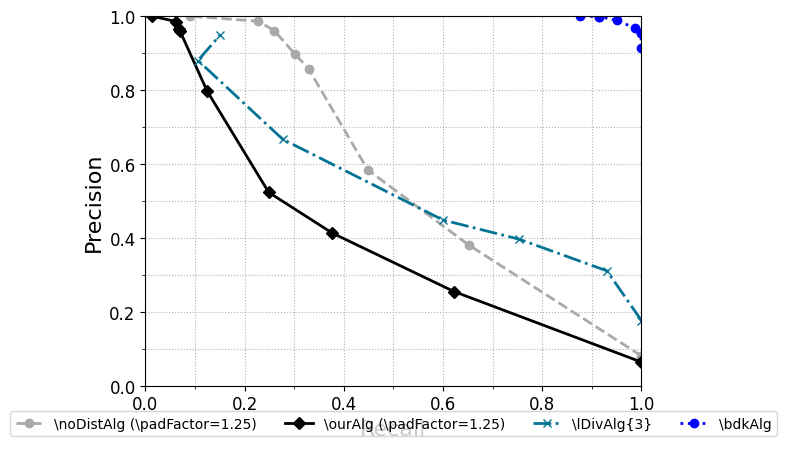

In [8]:
seq_len = 8
recall_precision_mp = precision_recall_autcomplete(pad_scheme_flat_pwod, seq_len=seq_len, method=f'pwod{c}')
plot_mp['\\noDistAlg'] = recall_precision_mp

recall_precision_mp = precision_recall_autcomplete(pad_scheme_pfs, seq_len=seq_len, method=f'lp-prefix(c={c})')
plot_mp['\\ourAlg'] = recall_precision_mp

recall_precision_mp = compute_precision_recall_ldiv_pad_scheme(l, pad_scheme_mvmd, seq_len, dataset)
plot_mp['\\lDivAlg{3}'] = recall_precision_mp

recall_precision_mp = precision_recall_autcomplete(pad_scheme_bdk_flat, seq_len=seq_len, method='Backes, et al.')
plot_mp['\\bdkAlg'] = recall_precision_mp

plot_precision_recall(plot_mp)

311
Counter({9: 168})
Target set size: 44; test set size: 168
number of words: 168
Len test seqs: 162
Len observed: 79
Len adversary: 8 162
0.4876543209876543
('returning', (306, 306, 306, 383, 383, 383, 480, 480, 480))
Tau: 0; precision=0.2502509201036748, recall=1.0
Tau: 0.1; precision=0.7315867583901642, recall=0.950561949331218
Tau: 0.2; precision=0.7319917822635144, recall=0.9504388447911827
Tau: 0.3; precision=0.7319917822635144, recall=0.9504388447911827
Tau: 0.5; precision=0.7319917822635144, recall=0.9504388447911827
Tau: 0.75; precision=1.0, recall=0.38920773240940126
Tau: 0.8; precision=1.0, recall=0.38920773240940126
Tau: 0.9; precision=1.0, recall=0.38920773240940126
Tau: 1; precision=1.0, recall=0.38920773240940126
311
Counter({9: 168})
Target set size: 44; test set size: 168
number of words: 168
Len test seqs: 162
Len observed: 79
Len adversary: 3 162
0.4876543209876543
('returning', (306, 306, 306, 383, 383, 383, 480, 480, 480))
Tau: 0; precision=0.012066372433924718, r

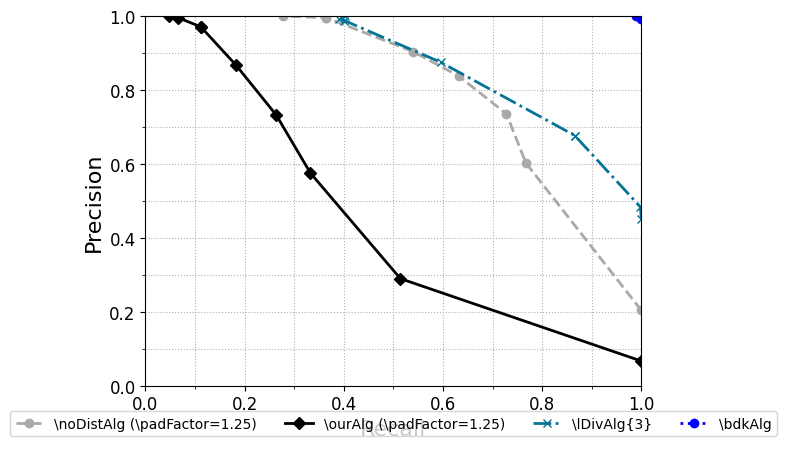

In [9]:
seq_len = 9
recall_precision_mp = precision_recall_autcomplete(pad_scheme_flat_pwod, seq_len=seq_len, method=f'pwod{c}')
plot_mp['\\noDistAlg'] = recall_precision_mp

recall_precision_mp = precision_recall_autcomplete(pad_scheme_pfs, seq_len=seq_len, method=f'lp-prefix(c={c})')
plot_mp['\\ourAlg'] = recall_precision_mp

l = 3
pad_scheme_mvmd = run_mvmd(dataset, l)['pad_scheme']
recall_precision_mp = compute_precision_recall_ldiv_pad_scheme(l, pad_scheme_mvmd, seq_len, dataset)
plot_mp['\\lDivAlg{3}'] = recall_precision_mp

recall_precision_mp = precision_recall_autcomplete(pad_scheme_bdk_flat, seq_len=seq_len, method='Backes, et al.')
plot_mp['\\bdkAlg'] = recall_precision_mp

plot_precision_recall(plot_mp)

### Linode from Index dataset

In [47]:
dataset = 'linode_from_index'
c = 1.25
l = 3

plot_mp = {}

pad_scheme_pwod, _ = run_pwod(dataset, c)
pad_scheme_pfs = run_pfs(dataset, c)['pad_scheme']

pad_scheme_bdk = run_bdk(dataset, num_trials=1000)['pad_scheme']

pad_scheme_mvmd = run_mvmd(dataset, l)['pad_scheme']

pad_scheme_bdk_flat = {k: v[0][0] for k,v in pad_scheme_bdk.items()}
pad_scheme_flat_pwod = {k: v[0][0] for k, v in pad_scheme_pwod.items() }

Gurobi's optimization method runtime (in seconds): 0.4756889343261719
Completed BDK Run 0
Completed BDK Run 1
Completed BDK Run 2
Completed BDK Run 3
Completed BDK Run 4
Completed BDK Run 5
Completed BDK Run 6
Completed BDK Run 7
Completed BDK Run 8
Completed BDK Run 9
Completed BDK Run 10
Completed BDK Run 11
Completed BDK Run 12
Completed BDK Run 13
Completed BDK Run 14
Completed BDK Run 15
Completed BDK Run 16
Completed BDK Run 17
Completed BDK Run 18
Completed BDK Run 19
Completed BDK Run 20
Completed BDK Run 21
Completed BDK Run 22
Completed BDK Run 23
Completed BDK Run 24
Completed BDK Run 25
Completed BDK Run 26
Completed BDK Run 27
Completed BDK Run 28
Completed BDK Run 29
Completed BDK Run 30
Completed BDK Run 31
Completed BDK Run 32
Completed BDK Run 33
Completed BDK Run 34
Completed BDK Run 35
Completed BDK Run 36
Completed BDK Run 37
Completed BDK Run 38
Completed BDK Run 39
Completed BDK Run 40
Completed BDK Run 41
Completed BDK Run 42
Completed BDK Run 43
Completed BDK Ru

Len test seqs: 774
Tau: 0; precision=0.12300319486852984, recall=0.9999999987012987
Tau: 0.1; precision=0.17948717942965153, recall=0.7272727263282173
Tau: 0.2; precision=0.26851851826989026, recall=0.3766233761342554
Tau: 0.3; precision=0.36363636253443526, recall=0.15584415564176085
Tau: 0.5; precision=0.7499999812500004, recall=0.03896103891044021
Tau: 0.75; precision=0.9999999500000026, recall=0.025974025940293476
Tau: 0.8; precision=0.9999999500000026, recall=0.025974025940293476
Tau: 0.9; precision=0.9999999500000026, recall=0.025974025940293476
Tau: 1; precision=0.9999999500000026, recall=0.025974025940293476
Len test seqs: 774
Tau: 0; precision=0.139492753597918, recall=0.9999999987012987
Tau: 0.1; precision=0.16666666662393162, recall=0.844155843059538
Tau: 0.2; precision=0.28431372521145715, recall=0.3766233761342554
Tau: 0.3; precision=0.47999999808, recall=0.15584415564176085
Tau: 0.5; precision=0.8571428448979593, recall=0.07792207782088043
Tau: 0.75; precision=0.999999975

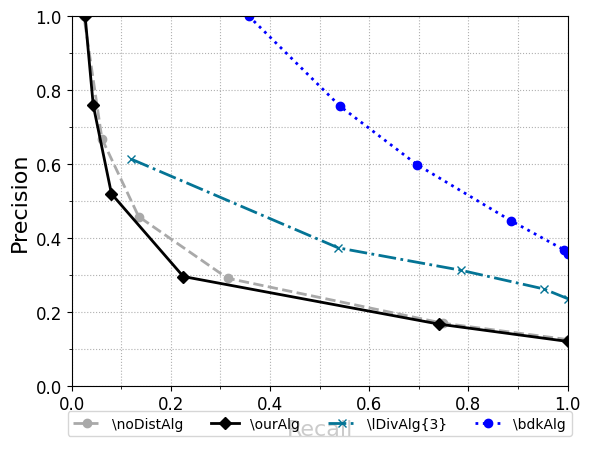

In [48]:
seq_len = 3
recall_precision_mp = precision_recall_linode_from_index(pad_scheme_flat_pwod, seq_len=seq_len, method=f'pwod{c}')
plot_mp['\\noDistAlg'] = recall_precision_mp

recall_precision_mp = precision_recall_linode_from_index(pad_scheme_pfs, seq_len=seq_len, method=f'lp-prefix(c={c})')
plot_mp['\\ourAlg'] = recall_precision_mp

recall_precision_mp = compute_precision_recall_ldiv_pad_scheme(l, pad_scheme_mvmd, seq_len, dataset)
plot_mp['\\lDivAlg{3}'] = recall_precision_mp

recall_precision_mp = precision_recall_linode_from_index(pad_scheme_bdk_flat, seq_len=seq_len, method='Backes, et al.')
plot_mp['\\bdkAlg'] = recall_precision_mp

plot_precision_recall(plot_mp)

### Wikipedia Dataset

In [49]:
dataset = 'wikipedia'
c = 2
l = 3


pad_scheme_pwod, _ = run_pwod(dataset, c)
pad_scheme_pfs = run_pfs(dataset, c)['pad_scheme']

pad_scheme_bdk = run_bdk(dataset, num_trials=10)['pad_scheme']

pad_scheme_mvmd = run_mvmd(dataset, l)['pad_scheme']

pad_scheme_bdk_flat = {k: v[0][0] for k,v in pad_scheme_bdk.items()}
pad_scheme_flat_pwod = {k: v[0][0] for k, v in pad_scheme_pwod.items() }

Gurobi's optimization method runtime (in seconds): 337.0612370967865
Completed BDK Run 0
Completed BDK Run 1
Completed BDK Run 2
Completed BDK Run 3
Completed BDK Run 4
Completed BDK Run 5
Completed BDK Run 6
Completed BDK Run 7
Completed BDK Run 8
Completed BDK Run 9
Completed 10 runs of BDK.
1
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set

In the plot below, we have commented out the line of code to produce the precision-recall plot for MVMD-3. We were running into some issues with this algorithm - since it is randomized, in some cases it leads to an issue with computing the precision-recall. We run into a division-by-zero error with computing the probability p(s|y) for certain sequences s. Unfortunattely, there's no easy workaround for this - because setting the value to a fixed constant can artificially inflate or deflate the precision/recall values for MVMD. As a result, to ensure the plot actually compiles, we commented out the problematic line of code and the plot does not show MVMD-3.

len test: 5169; len of target: 258
0.04991294254207753
Len test seqs: 5169
Tau: 0; precision=0.2979213002361197, recall=0.9999979965156418
Tau: 0.1; precision=0.6317271202839977, recall=0.8643393535774728
Tau: 0.2; precision=0.6822418920534759, recall=0.8488355086702536
Tau: 0.3; precision=0.7545112274120804, recall=0.8100758964022052
Tau: 0.5; precision=0.8235276231872748, recall=0.7596884004537425
Tau: 0.75; precision=0.9999966435177595, recall=0.5968980289279409
Tau: 0.8; precision=0.9999966435177595, recall=0.5968980289279409
Tau: 0.9; precision=0.9999966435177595, recall=0.5968980289279409
Tau: 1; precision=0.9999966435177595, recall=0.5968980289279409
len test: 5169; len of target: 258
0.04991294254207753
Len test seqs: 5169
Tau: 0; precision=0.2928488633671081, recall=0.9999979965156418
Tau: 0.1; precision=0.6280982791625324, recall=0.8837191597114971
Tau: 0.2; precision=0.7166111712823625, recall=0.8527114698970584
Tau: 0.3; precision=0.8069481964806063, recall=0.81007589640220

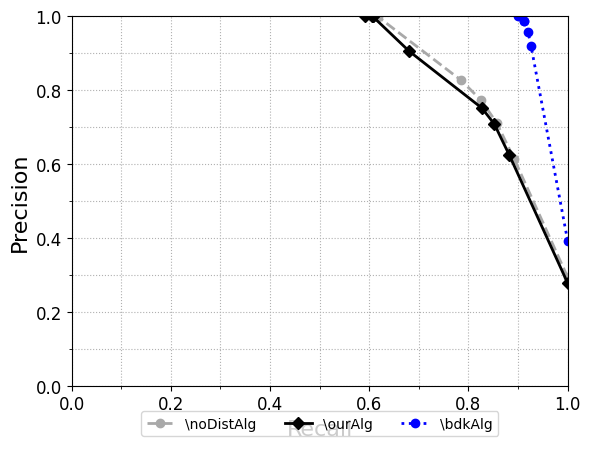

In [65]:
plot_mp = {}
seq_len = 8

recall_precision_mp = precision_recall_wiki(pad_scheme_flat_pwod, seq_len=seq_len, method=f'pwod{c}')
plot_mp['\\noDistAlg'] = recall_precision_mp

recall_precision_mp = precision_recall_wiki(pad_scheme_pfs, seq_len=seq_len, method=f'lp-prefix(c={c})')
plot_mp['\\ourAlg'] = recall_precision_mp

recall_precision_mp = compute_precision_recall_ldiv_pad_scheme(l, pad_scheme_mvmd, seq_len, dataset)
plot_mp['\\lDivAlg{3}'] = recall_precision_mp

recall_precision_mp = precision_recall_wiki(pad_scheme_bdk_flat, seq_len=seq_len, method='Backes, et al.')
plot_mp['\\bdkAlg'] = recall_precision_mp

plot_precision_recall(plot_mp)

In [59]:
# recall_precision_mp = precision_recall_wiki(pad_scheme_flat_pwod, seq_len=seq_len, method=f'pwod{c}')
# recall_precision_mp
mvmd_sizes = set([v[0][0] for v in pad_scheme_mvmd.values()])

len(mvmd_sizes)

554

In [62]:
pwod_sizes = set([v for v in pad_scheme_flat_pwod.values()])
pwod_sizes

{54192, 108822, 217742, 435528, 871287, 1745780}